Probablistic Graphical Models (PGM) help us represent the hidden structure within a dataset by estimating joint probability distribution between random variables. In the following exercise, we will use a randomly generated dataset of player performance based on lifestyle, fitness, performance during practice sessions and performance during matches. We will try to understand the relationship between different random variable as transpired by the available data.

To do the above, we will need to understand the conditional probability distribution (CPD) tables between different random variables in the dataset. We will generate CPD tables using maximum likelihood estimator and Bayesian estimator and observe how the CPDs generated by the Bayesian models differ based on the sample size as Bayesian models adjust the posterior probabilities based on the prior probabilities observed in the training data.

In this exercise, we will be using a python module called **pgmpy**. [pgmpy](https://pgmpy.org/) is a python module for working with probabilistic graphical models.

In [2]:
# Importing required modules and sub-modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
import networkx as nx

In [25]:
# Generating a random sample of size mXn -
# 10000 rows and 4 columns as there are 4 random variables in the dataset
# partying, fitness, practice performance and match performance

sample_size = 10000
raw_data = np.random.randint(low=0, high=2,size=(sample_size, 4)) 
raw_data

array([[1, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 1, 1, 0],
       ...,
       [1, 0, 0, 1],
       [0, 0, 1, 1],
       [1, 1, 0, 0]])

In [26]:
# Assigning column names to the dataset and converting it into a pandas dataframe

data = pd.DataFrame(raw_data, columns=['partying', 'fitness', 'practice_perf', 'match_perf'])

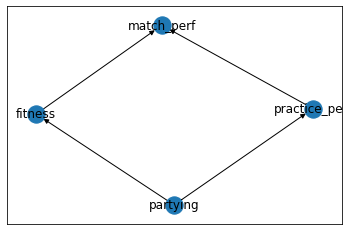

In [27]:
# Create a domain knowledge based model where:
# partying effects the fitness
# partying effects practice performance
# fitness effects match performance
# practice performance effects match performance

perf_model = BayesianModel([('partying', 'fitness'), ('partying', 'practice_perf'), ('fitness', 'match_perf'), ('practice_perf', 'match_perf')]) 
nx.draw_networkx(perf_model)
plt.show()


In [28]:
# Fitting the MLE on the data

perf_model.fit(data, estimator=MaximumLikelihoodEstimator) 
perf_model.get_cpds()

[<TabularCPD representing P(fitness:2 | partying:2) at 0x1c2621f310>,
 <TabularCPD representing P(match_perf:2 | fitness:2, practice_perf:2) at 0x1c2618f410>,
 <TabularCPD representing P(partying:2) at 0x1c2636d090>,
 <TabularCPD representing P(practice_perf:2 | partying:2) at 0x1c26385190>]

In [29]:
print(perf_model.get_cpds('match_perf'))

+---------------+--------------------+--------------------+---------------------+---------------------+
| fitness       | fitness(0)         | fitness(0)         | fitness(1)          | fitness(1)          |
+---------------+--------------------+--------------------+---------------------+---------------------+
| practice_perf | practice_perf(0)   | practice_perf(1)   | practice_perf(0)    | practice_perf(1)    |
+---------------+--------------------+--------------------+---------------------+---------------------+
| match_perf(0) | 0.5006016847172082 | 0.4856565656565657 | 0.48348106365834004 | 0.48901960784313725 |
+---------------+--------------------+--------------------+---------------------+---------------------+
| match_perf(1) | 0.4993983152827918 | 0.5143434343434343 | 0.5165189363416599  | 0.5109803921568628  |
+---------------+--------------------+--------------------+---------------------+---------------------+


To above conditional probability table tells us that when fitness=1 and practice_perf=1, there is 51% probability that the match_perf will be good (1). Keep in mind that the data was randomly generated.

Now, we will fit the Bayesian estimator on the data. Since the Bayesian estimator adjusts the posterior probabilities based on the prior probabilities observed in the data, the results might differ for different sample sizes.

In [30]:
perf_model.fit(data, estimator=BayesianEstimator) 
perf_model.get_cpds()

[<TabularCPD representing P(fitness:2 | partying:2) at 0x1c261ae890>,
 <TabularCPD representing P(match_perf:2 | fitness:2, practice_perf:2) at 0x1c26363a50>,
 <TabularCPD representing P(partying:2) at 0x1c26385f50>,
 <TabularCPD representing P(practice_perf:2 | partying:2) at 0x1c263aac50>]

In [31]:
print(perf_model.get_cpds('match_perf'))

+---------------+---------------------+--------------------+--------------------+--------------------+
| fitness       | fitness(0)          | fitness(0)         | fitness(1)         | fitness(1)         |
+---------------+---------------------+--------------------+--------------------+--------------------+
| practice_perf | practice_perf(0)    | practice_perf(1)   | practice_perf(0)   | practice_perf(1)   |
+---------------+---------------------+--------------------+--------------------+--------------------+
| match_perf(0) | 0.5006013831813171  | 0.4856638061585058 | 0.483489378838216  | 0.4890249877511024 |
+---------------+---------------------+--------------------+--------------------+--------------------+
| match_perf(1) | 0.49939861681868297 | 0.5143361938414942 | 0.5165106211617839 | 0.5109750122488976 |
+---------------+---------------------+--------------------+--------------------+--------------------+
